### metasurface

Populating the interactive namespace from numpy and matplotlib
T:  (6.12323399574e-17+1j)    R:  0j
abs(T):  1.0    abs(R):  0.0
theta_i:  59.99999999999999
theta_r:  180.0
theta_t:  -59.99999999999999
E_i =  [ 1.  0.  0.]   k_i =  [  5.30287619e-17   8.66025404e-01   5.00000000e-01]
E_r =  [ 0.+0.j  0.+0.j  0.+0.j]   k_r =  [  7.49879891e-33   1.22464680e-16  -1.00000000e+00]
E_t =  [  6.12323400e-17+1.j   0.00000000e+00+0.j   0.00000000e+00+0.j]   k_t =  [ -5.30287619e-17  -8.66025404e-01   5.00000000e-01]
X polarized incidence..


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


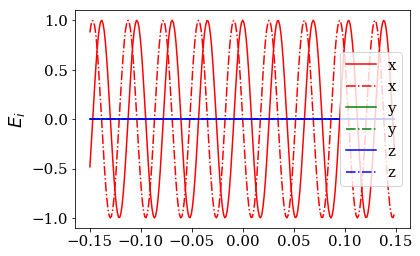

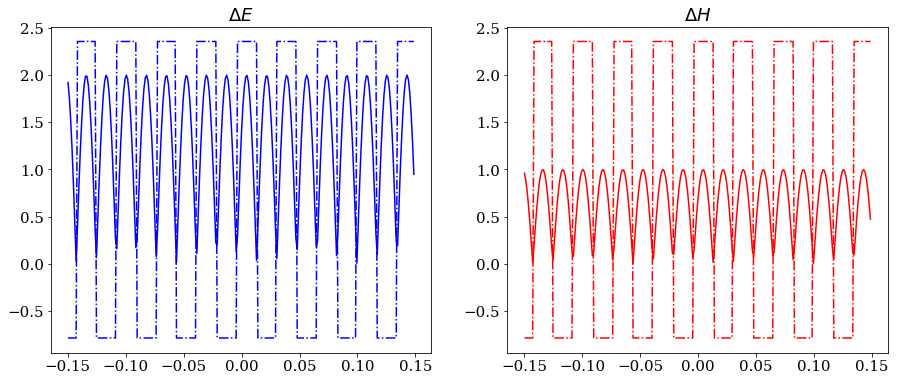

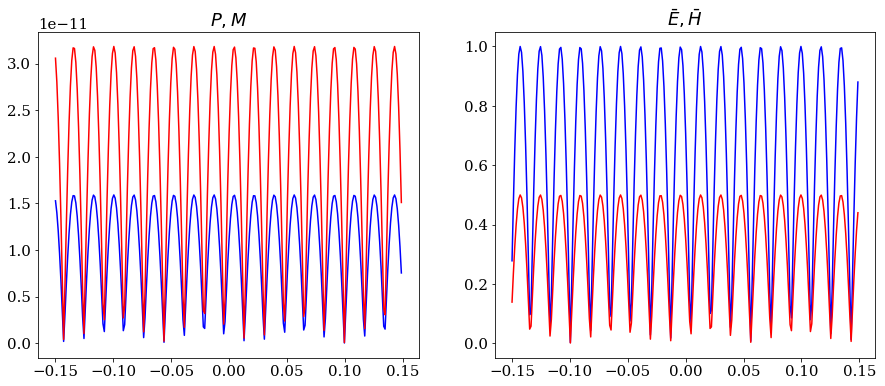

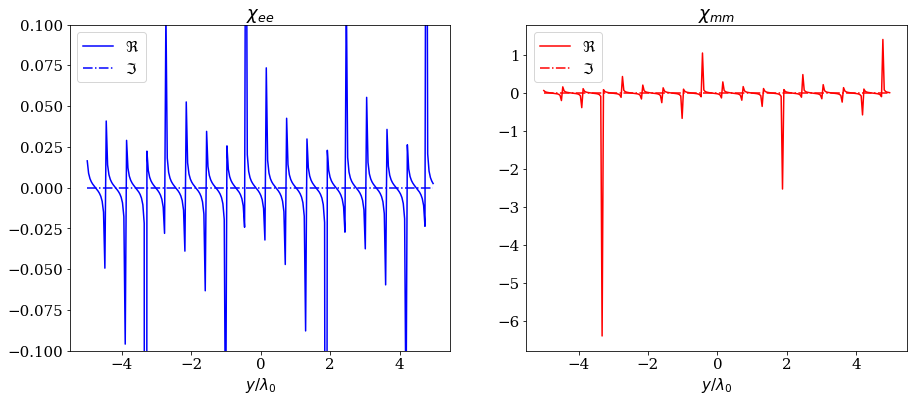

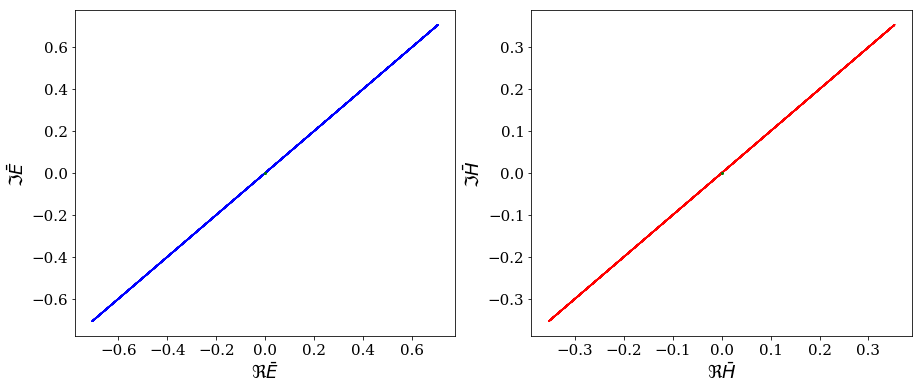

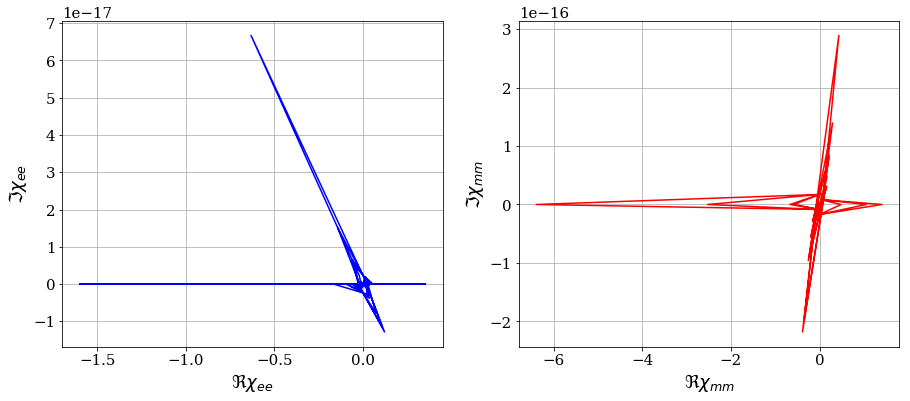

In [38]:
## GSTC perfect refraction

%pylab inline

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 15}
matplotlib.rc('font', **font)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import constants
from Electromagnetics.GSTCFD import GSTCFD_2D, PlaneWaveFD, MSTypes, GSTCFDSpectralAnalyzer
import scipy

f = 10.0*constants.giga

theta_i = 60.0/180.0*np.pi
theta_r = 180.0/180.0*np.pi
theta_t = -60/180.0*np.pi

T = 1.0*np.exp(1j*90.0/180.0*np.pi)*np.cos(theta_t)/np.cos(theta_i)
R = 0.0*np.exp(1j*0.0/180.0*np.pi)

print('T: ', T, '   R: ', R)
print('abs(T): ', np.abs(T), '   abs(R): ', np.abs(R))
print('theta_i: ', theta_i*180.0/np.pi)
print('theta_r: ', theta_r*180.0/np.pi)
print('theta_t: ', theta_t*180.0/np.pi)

a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(theta_i, np.pi/2.0)
k_i = a_r
a_x = np.array([1.0, 0.0, 0.0])#-a_phi
E_i = 1.0*a_x
print('E_i = ', E_i, '  k_i = ', k_i)

a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(theta_r, np.pi/2.0)
k_r = a_r
E_r = R*a_x
print('E_r = ', E_r, '  k_r = ', k_r)

a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(theta_t, np.pi/2.0)
k_t = a_r
E_t = T*a_x
print('E_t = ', E_t, '  k_t = ', k_t)


pw = PlaneWaveFD(f, vbose=True)

pw.SetPW(E_i, E_r, E_t, k_i, k_r, k_t)

N = 2**8
L0 = constants.c/f
y_max = 10.0*L0
y, E_irt, H_irt = pw.GetIRTFieldsOnMS(N_y=N, nl_y=1.0, l_y_max=y_max)
E_i_vec, E_r_vec, E_t_vec = E_irt
H_i_vec, H_r_vec, H_t_vec = H_irt

ms = GSTCFD_2D(f, MSTypes.scalar, vbose=True)
ms.SetFields(y, E_irt, H_irt)

X_eemm, PM, EH_avg = ms.GetSusceptibilities()
dy = y[1]-y[0]

P, M = PM
E_avg, H_avg = EH_avg
X_ee, X_mm = X_eemm

plot(y, np.real(E_i_vec[0]), 'r', y, np.imag(E_i_vec[0]), 'r-.', label='x')
plot(y, np.real(E_i_vec[1]), 'g', y, np.imag(E_i_vec[1]), 'g-.', label='y')
plot(y, np.real(E_i_vec[2]), 'b', y, np.imag(E_i_vec[2]), 'b-.', label='z')
ylabel('$E_i$', fontsize=18)
legend()
show()

mu_0 = constants.mu_0
eps_0 = constants.epsilon_0
eta_0 = np.sqrt(constants.mu_0/constants.epsilon_0)
lambda_0 = constants.c/f

del_E_vec = E_t_vec - (E_i_vec + E_r_vec)
del_H_vec = H_t_vec - (H_i_vec + H_r_vec)


figsize(15, 6)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(y, np.abs(del_E_vec[0]), 'b')
ax1.plot(y, np.angle(del_E_vec[0]), 'b-.')
ax1.set_title(r'$\Delta E$', fontsize=18)

ax2.plot(y, np.abs(del_H_vec[1])*eta_0, 'r')
ax2.plot(y, np.angle(del_H_vec[1]), 'r-.')
ax2.set_title(r'$\Delta H$', fontsize=18)
show()


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(y, np.abs(P[0,:])*eta_0, 'b')
ax1.plot(y, np.abs(M[1,:])*mu_0, 'r')
ax1.set_title(r'$P, M$', fontsize=18)

ax2.plot(y, np.abs(E_avg[0,:]), 'b')
ax2.plot(y, np.abs(H_avg[1,:])*eta_0, 'r')
ax2.set_title(r'$\bar{E}, \bar{H}$', fontsize=18)
show()


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(y/L0, np.real(X_ee), 'b', label='$\Re$')
ax1.plot(y/L0, np.imag(X_ee), 'b-.', label='$\Im$')
ax1.set_title(r'$\chi_{ee}$', fontsize=18)
ax1.set_xlabel(r'$y/\lambda_0$')
ax1.legend()
if np.max(np.abs(X_ee))*f/1.0e9>1.0:
    ax1.set_ylim(np.array([-1, 1])/(f/1.0e9))

ax2.plot(y/L0, np.real(X_mm), 'r', label='$\Re$')
ax2.plot(y/L0, np.imag(X_mm), 'r-.', label='$\Im$')
ax2.set_title(r'$\chi_{mm}$', fontsize=18)
ax2.set_xlabel(r'$y/\lambda_0$')
ax2.legend()
if np.max(np.abs(X_mm))*f/1.0e9>1.0:
    ax1.set_ylim(np.array([-1, 1])/(f/1.0e9))
savefig("other/chi_eemm.png", bbox_inches='tight', pad_inches=0.5)
show()


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(np.real(E_avg[0,:]), np.imag(E_avg[0,:]), 'b')
ax1.plot([0], [0], 'go', markersize=2.0)
ax1.set_xlabel(r'$\Re{\bar{E}}$', fontsize=18)
ax1.set_ylabel(r'$\Im{\bar{E}}$', fontsize=18)
ax2.plot(np.real(H_avg[1,:])*eta_0, np.imag(H_avg[1,:])*eta_0, 'r')
ax2.plot([0], [0], 'go', markersize=2.0)
ax2.set_xlabel(r'$\Re{\bar{H}}$', fontsize=18)
ax2.set_ylabel(r'$\Im{\bar{H}}$', fontsize=18)
show()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(np.real(X_ee), np.imag(X_ee), 'b')
#ax1.plot([0], [0], 'go')
ax1.set_xlabel(r'$\Re{\chi_{ee}}$', fontsize=18)
ax1.set_ylabel(r'$\Im{\chi_{ee}}$', fontsize=18)
ax1.grid()
ax2.plot(np.real(X_mm), np.imag(X_mm), 'r')
#ax2.plot([0], [0], 'go')
ax2.set_xlabel(r'$\Re{\chi_{mm}}$', fontsize=18)
ax2.set_ylabel(r'$\Im{\chi_{mm}}$', fontsize=18)
ax2.grid()
show()



## metaslab

### reflectionless perfect refraction - gradual change of direction

Populating the interactive namespace from numpy and matplotlib
E_i =  [ 1.+0.j  0.+0.j  0.+0.j]   k_i =  [  5.30287619e-17   8.66025404e-01   5.00000000e-01]
E_r =  [ 0.  0.  0.]   k_r =  [  7.49879891e-33   1.22464680e-16  -1.00000000e+00]
E_t =  [-1. +1.22464680e-16j -0. +0.00000000e+00j -0. +0.00000000e+00j]   k_t =  [ -5.30287619e-17  -8.66025404e-01   5.00000000e-01]
X polarized incidence..


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


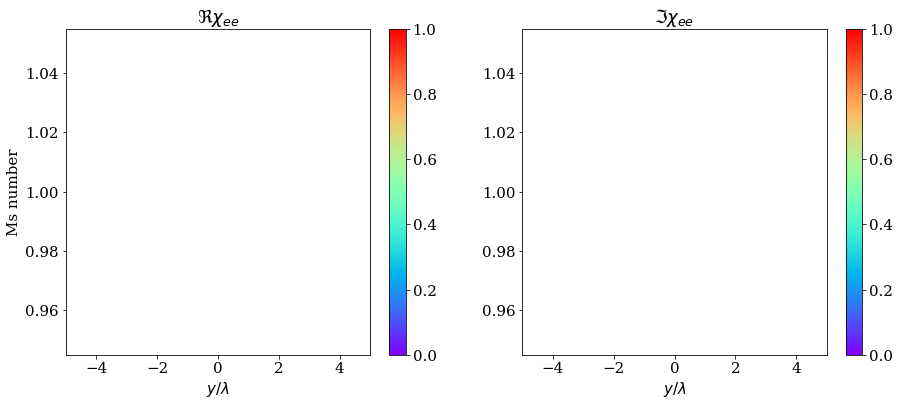

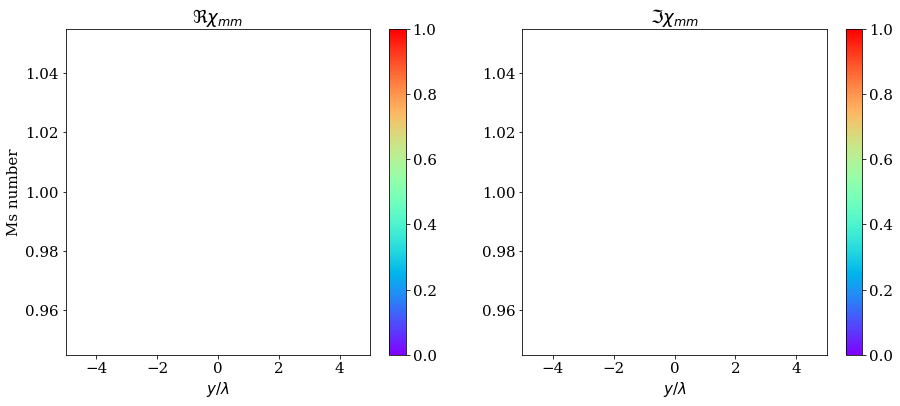

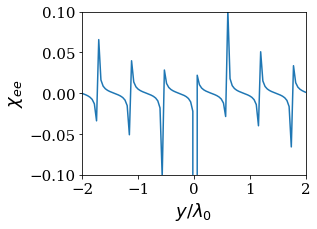

In [37]:

%pylab inline

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 15}
matplotlib.rc('font', **font)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import constants
from Electromagnetics.GSTCFD import GSTCFD_2D, PlaneWaveFD, MSTypes, GSTCFDSpectralAnalyzer
import scipy


def MS_reflectionless_perfect_refract_interpolate_angle(f, theta_i, theta_t, T=1.0, n_ms=10, y_max_L0=10, Ny=2**8, 
                                                        ret_E_mid=False):
    I, R = 1.0, 0.0
    X_ee_arr = np.zeros((n_ms, Ny), dtype=complex)
    X_mm_arr = np.zeros((n_ms, Ny), dtype=complex)
    th_i_i = theta_i 
    I_i = I
    T_i = I*np.power(T, 1.0/n_ms)
    E_mid_arr, H_mid_arr = [], []
    for i in range(1, n_ms+1):
        th_t_i = theta_i + i/n_ms*(theta_t - theta_i)
        I_i = I*np.power(T_i, i-1)
        
        a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(th_i_i, np.pi/2.0)
        k_i = a_r
        a_x = np.array([1.0, 0, 0]) # -a_phi
        E_i = I_i*a_x
        #print(a_phi)
        print('E_i = ', E_i, '  k_i = ', k_i)

        a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(np.pi, np.pi/2.0)
        k_r = a_r
        E_r = R*a_x
        print('E_r = ', E_r, '  k_r = ', k_r)

        a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(th_t_i, np.pi/2.0)
        k_t = a_r
        E_t = T_i*a_x
        print('E_t = ', E_t, '  k_t = ', k_t)

        pw = PlaneWaveFD(f, vbose=True)

        pw.SetPW(E_i, E_r, E_t, k_i, k_r, k_t)

        L0 = constants.c/f
        y_max = y_max_L0*L0
        y, E_irt, H_irt = pw.GetIRTFieldsOnMS(N_y=Ny, nl_y=1.0, l_y_max=y_max)
        E_i_vec, E_r_vec, E_t_vec = E_irt
        H_i_vec, H_r_vec, H_t_vec = H_irt
        
        '''if i<n_ms:
            E_t_vec[0] = E_arr_0[i-1]
            E_t_vec[1] = np.zeros(Ny)
            H_t_vec[0] = np.zeros(Ny)
            H_t_vec[1] = H_arr_0[i-1]
            """print("i : ", i)
            plot(y, np.real(E_t_vec[0]), 'b')
            plot(y, np.real(E_arr_0[i-1]), 'b:')
            plot(y, np.imag(E_t_vec[0]), 'r')
            plot(y, np.imag(E_arr_0[i-1]), 'r:')
            title('$E_x$', fontsize=18)
            show()"""
        if i>1 and i<n_ms:
            """print("i : ", i)
            plot(y, np.real(E_i_vec[0]), 'b')
            plot(y, np.real(E_arr_0[i-2]), 'b:')
            plot(y, np.imag(E_i_vec[0]), 'r')
            plot(y, np.imag(E_arr_0[i-2]), 'r:')
            title('$E_x$', fontsize=18)
            show()"""
            E_i_vec[0] = E_arr_0[i-2]
            E_i_vec[1] = np.zeros(Ny)
            H_i_vec[0] = np.zeros(Ny)
            H_i_vec[1] = H_arr_0[i-2]'''
        
        ms = GSTCFD_2D(f, MSTypes.scalar, vbose=True)
        ms.SetFields(y, E_irt, H_irt)

        X_eemm, PM, EH_avg = ms.GetSusceptibilities()
        #dy = y[1]-y[0]
                  
        P, M = PM
        E_avg, H_avg = EH_avg
        X_ee, X_mm = X_eemm

        X_ee_arr[i-1,:] = X_ee
        X_mm_arr[i-1,:] = X_mm
        
        th_i_i = th_t_i

        if i<n_ms and ret_E_mid:
            E_mid_arr.append(np.copy(E_t_vec[0,:]))
            H_mid_arr.append(np.copy(H_t_vec[1,:]))
                
    if ret_E_mid:
        return E_mid_arr, H_mid_arr
    return X_ee_arr, X_mm_arr



f = 10.0*constants.giga

theta_i = 60.0/180.0*np.pi
theta_t = -60/180.0*np.pi

T = 1.0*np.exp(1j*180.0/180.0*np.pi)*np.cos(theta_t)/np.cos(theta_i)

Ny = 2**8
y_max_L0 = 10
n_ms = 1

X_ee_arr, X_mm_arr = MS_reflectionless_perfect_refract_interpolate_angle(f, theta_i, theta_t, T=T, n_ms=n_ms, y_max_L0=y_max_L0, Ny=Ny)

y = np.linspace(-y_max_L0/2, y_max_L0/2, Ny)
N, Y = np.meshgrid(np.arange(1, n_ms+1), y, indexing='ij')

figsize(15, 6)
subplot(1, 2, 1)
pcolormesh(Y, N, np.real(X_ee_arr), cmap='rainbow')
title(r'$\Re\chi_{ee}$', fontsize=18)
xlabel(r'$y/\lambda$')
ylabel('Ms number')
colorbar()

subplot(1, 2, 2)
pcolormesh(Y, N, np.imag(X_ee_arr), cmap='rainbow')
title(r'$\Im\chi_{ee}$', fontsize=18)
xlabel(r'$y/\lambda$')
colorbar()
savefig("other/chi_ee.png", bbox_inches='tight', pad_inches=0.5)
show()

subplot(1, 2, 1)
pcolormesh(Y, N, np.real(X_mm_arr), cmap='rainbow')
title(r'$\Re\chi_{mm}$', fontsize=18)
xlabel(r'$y/\lambda$')
ylabel('Ms number')
colorbar()

subplot(1, 2, 2)
pcolormesh(Y, N, np.imag(X_mm_arr), cmap='rainbow')
title(r'$\Im\chi_{mm}$', fontsize=18)
xlabel(r'$y/\lambda$')
colorbar()
savefig("other/chi_mm.png", bbox_inches='tight', pad_inches=0.5)
show()


figsize(4, 3)
for i in range(n_ms):
    plot(y, np.real(X_ee_arr[i, :]))
    xlim(-2, 2)
    ylim(-0.1, 0.1)
    xlabel(r"$y/\lambda_0$", fontsize=18)
    ylabel(r"$\chi_{ee}$", fontsize=18)
    
savefig("other/chi_ee_{}.png".format(n_ms), bbox_inches='tight', pad_inches=0.5)
show()


#E_arr_0, H_arr_0 = MS_reflectionless_perfect_refract_interpolate_angle(f, theta_i, theta_t, T=T, n_ms=n_ms, y_max_L0=y_max_L0, Ny=Ny, ret_E_mid=True)



### reflectionless perfect refraction - optimize

### optimize 1

Populating the interactive namespace from numpy and matplotlib
dy_smallest/L0 :  3.6363636363636362
time_start:  51913.139827803


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1/200 2/200 3/200 4/200 5/200 6/200 7/200 8/200 9/200 10/200 11/200 12/200 13/200 14/200 15/200 16/200 17/200 18/200 19/200 20/200 21/200 22/200 23/200 24/200 25/200 26/200 27/200 28/200 29/200 30/200 31/200 32/200 33/200 34/200 35/200 36/200 37/200 38/200 39/200 40/200 41/200 42/200 43/200 44/200 45/200 46/200 47/200 48/200 49/200 50/200 51/200 52/200 53/200 54/200 55/200 56/200 57/200 58/200 59/200 60/200 61/200 62/200 63/200 64/200 65/200 66/200 67/200 68/200 69/200 70/200 71/200 72/200 73/200 74/200 75/200 76/200 77/200 78/200 79/200 80/200 81/200 82/200 83/200 84/200 85/200 86/200 87/200 88/200 89/200 90/200 91/200 92/200 93/200 94/200 95/200 96/200 97/200 98/200 99/200 100/200 101/200 102/200 103/200 104/200 105/200 106/200 107/200 108/200 109/200 110/200 111/200 112/200 113/200 114/200 115/200 116/200 117/200 118/200 119/200 120/200 121/200 122/200 123/200 124/200 125/200 126/200 127/200 128/200 129/200 130/200 131/200 132/200 133/200 134/200 135/200 136/200 137/200 138/200 139/

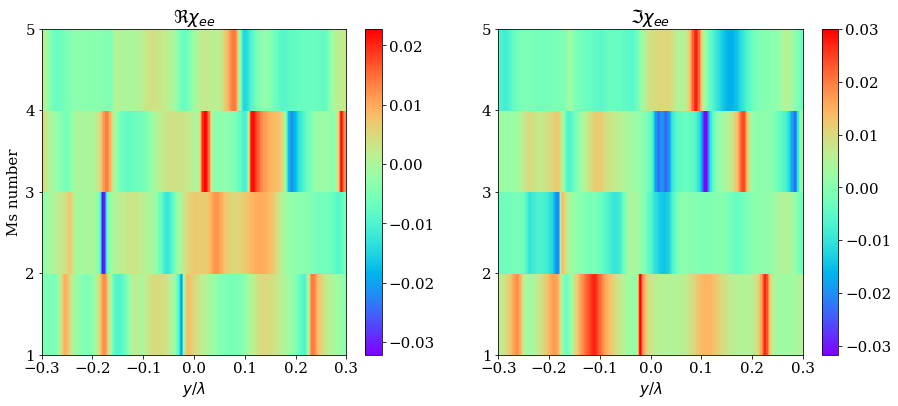

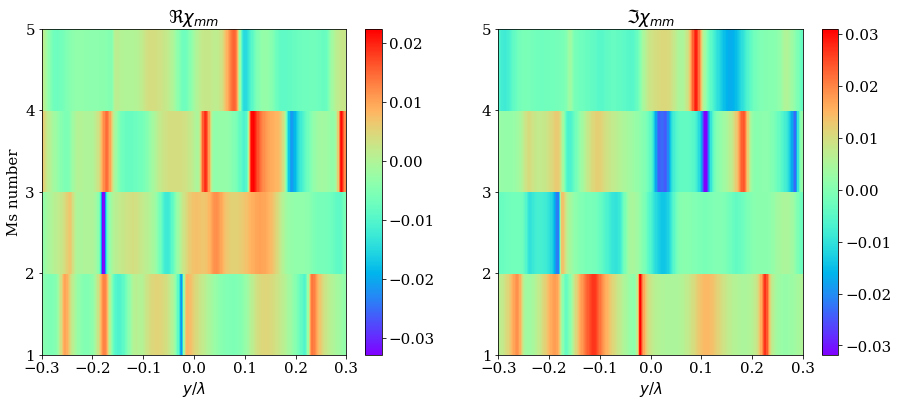

In [30]:
%pylab inline

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 15}
matplotlib.rc('font', **font)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import constants
from Electromagnetics.GSTCFD import GSTCFD_2D, PlaneWaveFD, MSTypes, GSTCFDSpectralAnalyzer
import scipy
from Electromagnetics.PWE import *


def MS_reflectionless_perfect_refract_E_arr(f, E_arr, y_max_L0):
    """ E_arr: incident field, intermediate fields and final transmitted field
        E_arr[0] : incident
        E_arr[1:-1]: intermediate fields
        E_arr[-1] : transmitted field
    """
    n_ms = E_arr.shape[0]-1
    Ny = E_arr.shape[1]
    X_ee_arr = np.zeros((n_ms, Ny), dtype=complex)
    X_mm_arr = np.zeros((n_ms, Ny), dtype=complex)
    
    L0 = constants.c/f
    y = np.linspace(-y_max_L0*L0, y_max_L0*L0, Ny)
    Ey = np.zeros(Ny, dtype=complex)
    Er = np.zeros((3, Ny), dtype=complex)
    Hr = np.zeros((3, Ny), dtype=complex)
    for i in range(0, n_ms):
        Ex_i   = E_arr[i,:]
        Ex_ip1 = E_arr[i+1,:]

        pwe = PWE2D(f, y, Ex_i, Ey)
        pwe.GetK()
        Z, Y, E_i_vec, H_i_vec = pwe.GetFields(np.array([0.0]))
        
        pwe = PWE2D(f, y, Ex_ip1, Ey)
        pwe.GetK()
        Z, Y, E_ip1_vec, H_ip1_vec = pwe.GetFields(np.array([0.0]))
        
        E_i_vec_ = np.zeros((3,Ny), dtype=complex)
        E_ip1_vec_ = np.zeros((3,Ny), dtype=complex)
        #print("E_i_vec[0].shape: ", E_i_vec[0][0,:].shape, E_i_vec_[0, :].shape)
        E_i_vec_[0, :] = E_i_vec[0][0,:]
        E_i_vec_[1, :] = E_i_vec[1][0,:]
        E_i_vec_[2, :] = E_i_vec[2][0,:]
        E_ip1_vec_[0, :] = E_ip1_vec[0][0,:]
        E_ip1_vec_[1, :] = E_ip1_vec[1][0,:]
        E_ip1_vec_[2, :] = E_ip1_vec[2][0,:]
        
        H_i_vec_ = np.zeros((3,Ny), dtype=complex)
        H_ip1_vec_ = np.zeros((3,Ny), dtype=complex)
        H_i_vec_[0, :] = H_i_vec[0][0,:]
        H_i_vec_[1, :] = H_i_vec[1][0,:]
        H_i_vec_[2, :] = H_i_vec[2][0,:]
        H_ip1_vec_[0, :] = H_ip1_vec[0][0,:]
        H_ip1_vec_[1, :] = H_ip1_vec[1][0,:]
        H_ip1_vec_[2, :] = H_ip1_vec[2][0,:]

        
        """if i<n_ms-1:
            print('i: ', i)
            plot(y, np.real(E_ip1_vec_[0]), 'b')
            plot(y, np.real(E_arr_0[i]), 'b:')
            plot(y, np.imag(E_ip1_vec_[0]), 'r')
            plot(y, np.imag(E_arr_0[i]), 'r:')
            ylabel('$E_x$', fontsize=20)
            show()
            plot(y, np.real(H_ip1_vec_[1]), 'b')
            plot(y, np.real(H_arr_0[i]), 'b:')
            plot(y, np.imag(H_ip1_vec_[1]), 'r')
            plot(y, np.imag(H_arr_0[i]), 'r:')
            ylabel('$H_y$', fontsize=20)
            show()
            
        if i<n_ms-1:
            E_ip1_vec_[0,:] = E_arr_0[i]
            E_ip1_vec_[1,:] = np.zeros(Ny)
            H_ip1_vec_[0,:] = np.zeros(Ny)
            H_ip1_vec_[1,:] = H_arr_0[i]
        if i>0:
            E_i_vec_[0,:] = E_arr_0[i-1]
            E_i_vec_[1,:] = np.zeros(Ny)
            H_i_vec_[0,:] = np.zeros(Ny)
            H_i_vec_[1,:] = H_arr_0[i-1]
        """
        
        E_irt = [E_i_vec_, Er, E_ip1_vec_]
        H_irt = [H_i_vec_, Hr, H_ip1_vec_]

        
        #print(E_i_vec_.shape, Er.shape, E_ip1_vec_.shape)
        #print(H_i_vec_.shape, Hr.shape, H_ip1_vec_.shape)
        
        ms = GSTCFD_2D(f, MSTypes.scalar, vbose=False)
        ms.SetFields(y, E_irt, H_irt)

        X_eemm, PM, EH_avg = ms.GetSusceptibilities()
        #dy = y[1]-y[0]

        P, M = PM
        E_avg, H_avg = EH_avg
        X_ee, X_mm = X_eemm

        X_ee_arr[i,:] = X_ee
        X_mm_arr[i,:] = X_mm
        
    return X_ee_arr, X_mm_arr


def E_fourier_to_E_space(E_f_arr, _y, y):
    """ Per_y : period along y
    """
    n_arr = E_f_arr.shape[0]
    Ny = len(y)
    E_arr = np.zeros((n_arr, Ny), dtype=complex)
    N_f_pm = E_f_arr.shape[1]
    assert N_f_pm%2==1
    N_f = int(N_f_pm/2)
    ky = 2.0*np.pi*(_y[1]-_y[0])
    for i in range(n_arr):
        for j in range(-N_f, N_f+1):
            E_arr[i, :] += E_f_arr[i, j+N_f]*exp(1j*j*ky*y)
    return E_arr


def X_optimize(f, n_ms, E_i, E_t, E_f_re, y_max_L0, ret_X=False):
    n_e_2 = len(E_f_re)
    assert n_e_2%(2*(n_ms-1))==0
    n_harm_2 = n_e_2//(2*(n_ms-1))
    
    Ny = len(E_i)
    E_arr = np.zeros((n_ms+1, Ny), dtype=complex)
    E_arr[0,:] = E_i
    E_arr[-1, :] = E_t
    
    assert n_harm_2%2==1
    #n_harm = n_harm_2//2
    E_ms_f_arr = np.zeros((n_ms-1, n_harm_2), dtype=complex)
    for i in range(n_ms-1):
        for j in range(n_harm_2):
            E_ms_f_arr[i, j] = E_f_re[2*i*n_harm_2 + j] + 1j*E_f_re[(2*i+1)*n_harm_2 + j]
    
    L0 = constants.c/f
    y = np.linspace(-y_max_L0*L0, y_max_L0*L0, Ny)
    _y = FourierReciprocalSpace(y)
    E_ms_arr = E_fourier_to_E_space(E_ms_f_arr, _y, y)
    
    E_arr[1:-1, :] = E_ms_arr
    
        
    X_ee_arr, X_mm_arr = MS_reflectionless_perfect_refract_E_arr(f, E_arr, y_max_L0)
    
    if ret_X:
        """for __jj in range(n_ms-1):
            plot(y, np.real(E_arr_0[__jj]), 'r')
            plot(y, np.real(E_ms_arr[__jj]), 'r:')
            plot(y, np.imag(E_arr_0[__jj]), 'b')
            plot(y, np.imag(E_ms_arr[__jj]), 'b:')
            show()
        print("Max error : ", np.max(np.abs(E_arr_0 - E_ms_arr)))"""
        return X_ee_arr, X_mm_arr
    
    cost = np.max(np.abs(np.real(X_ee_arr))) + np.max(np.abs(np.real(X_mm_arr))) \
        + 10.0*np.max(np.abs(np.imag(X_ee_arr))) + 10.0*np.max(np.abs(np.imag(X_mm_arr)))
        
    
    return cost


def MS_reflectionless_perfect_refract_Get_IT_Efields(f, theta_i, theta_t, T=1, y_max_L0=10, Ny=2**8):
    I, R = 1.0, 0.0
    X_ee_arr = np.zeros((n_ms, Ny), dtype=complex)
    X_mm_arr = np.zeros((n_ms, Ny), dtype=complex)

    a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(theta_i, np.pi/2.0)
    k_i = a_r
    a_x = np.array([1.0, 0.0, 0.0])#-a_phi
    E_i = I*a_x

    a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(np.pi, np.pi/2.0)
    k_r = a_r
    E_r = R*a_x

    a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(theta_t, np.pi/2.0)
    k_t = a_r
    E_t = T*a_x

    pw = PlaneWaveFD(f, vbose=False)

    pw.SetPW(E_i, E_r, E_t, k_i, k_r, k_t)

    L0 = constants.c/f
    y_max = y_max_L0*L0
    y, E_irt, H_irt = pw.GetIRTFieldsOnMS(N_y=Ny, nl_y=1.0, l_y_max=y_max)
    E_i_vec, E_r_vec, E_t_vec = E_irt
    H_i_vec, H_r_vec, H_t_vec = H_irt

    return E_i_vec[0], E_t_vec[0]
        

f = 10.0*constants.giga
L0 = constants.c/f

T = 1.0
theta_i = 30.0/180.0*np.pi
theta_t = -45/180.0*np.pi

Ny = 2**8
y_max_L0 = 10
n_ms = 5

n_harm = 5
Nharm = 2*n_harm+1
dy_smallest = 2.0*y_max_L0*L0/(Nharm/2)
print("dy_smallest/L0 : ", dy_smallest/L0)

E_i, E_t = MS_reflectionless_perfect_refract_Get_IT_Efields(f, theta_i, theta_t, T=1, y_max_L0=y_max_L0, Ny=Ny)

## initial optimum indivitual : I will manually set a member of the first population
E_arr_0, H_arr_0 = MS_reflectionless_perfect_refract_interpolate_angle(f, theta_i, theta_t, T=T, n_ms=n_ms, y_max_L0=y_max_L0, Ny=Ny, ret_E_mid=True)
E_arr_f_0 = np.zeros(2*Nharm*(n_ms-1))
for i in range(n_ms-1):
    _y, _e_f_i = Fourier1D(y, E_arr_0[i])
    ind_st = i*2*Nharm
    ind_0 = Ny//2
    E_arr_f_0[ind_st: ind_st+Nharm] = np.real(_e_f_i[ind_0-n_harm:ind_0+n_harm+1])
    E_arr_f_0[ind_st+Nharm: ind_st+2*Nharm] = np.imag(_e_f_i[ind_0-n_harm:ind_0+n_harm+1])

f_opt = lambda E_f_re, ret_X=False : X_optimize(f, n_ms, E_i, E_t, E_f_re, y_max_L0, ret_X)


from Electromagnetics.Misc import tic, toc
tic()
from Electromagnetics.EvolAlgs import gaOptimizer

res = gaOptimizer(f_opt, intervals=[(-1.0, 1.0)]*2*Nharm*(n_ms-1), pop_size=400, n_gen=200, mu_sd=0.2,
                 maximize=False, parallel=False, x_0=E_arr_f_0) #x_0 E_arr_f_0

print("optimum cost: ", res[0][1])

print("Processing time:", toc())


X_ee_arr, X_mm_arr = f_opt(res[0][0], ret_X=True)  ## test: res[0] --> E_arr_f_0


y = np.linspace(-y_max_L0*L0, y_max_L0*L0, Ny)
N, Y = np.meshgrid(np.arange(1, n_ms+1), y, indexing='ij')

print(X_ee_arr.shape, N.shape)

figsize(15, 6)
subplot(1, 2, 1)
pcolormesh(Y, N, np.real(X_ee_arr), cmap='rainbow')
title(r'$\Re\chi_{ee}$', fontsize=18)
xlabel(r'$y/\lambda$')
ylabel('Ms number')
yticks(np.arange(1, n_ms+1))
colorbar()

subplot(1, 2, 2)
pcolormesh(Y, N, np.imag(X_ee_arr), cmap='rainbow')
title(r'$\Im\chi_{ee}$', fontsize=18)
xlabel(r'$y/\lambda$')
yticks(np.arange(1, n_ms+1))
colorbar()
savefig("other/chi_ee.png", bbox_inches='tight', pad_inches=0.5)
show()

subplot(1, 2, 1)
pcolormesh(Y, N, np.real(X_mm_arr), cmap='rainbow')
title(r'$\Re\chi_{mm}$', fontsize=18)
xlabel(r'$y/\lambda$')
ylabel('Ms number')
yticks(np.arange(1, n_ms+1))
colorbar()

subplot(1, 2, 2)
pcolormesh(Y, N, np.imag(X_mm_arr), cmap='rainbow')
title(r'$\Im\chi_{mm}$', fontsize=18)
xlabel(r'$y/\lambda$')
yticks(np.arange(1, n_ms+1))
colorbar()
savefig("other/chi_mm.png", bbox_inches='tight', pad_inches=0.5)
show()



### optimize 2

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


time_start:  6041.648799136


/home/nima/ipython workspace/Electromagnetics/GSTCFD.py:241: RuntimeWarning: divide by zero encountered in true_divide
  X_ee = P[0,:]/(E_avg[0,:]*constants.epsilon_0)


optimum cost:  [ 0.81741411]
time_end:  6132.692012135
Processing time: 0:01:31


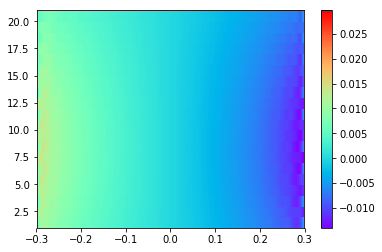

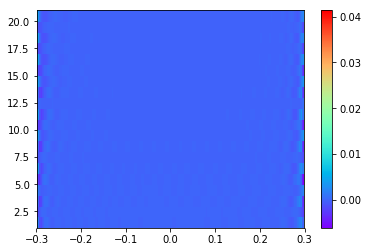

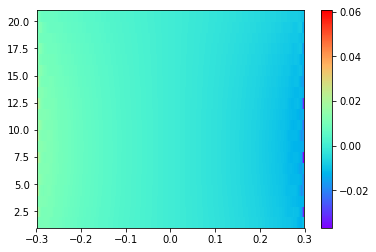

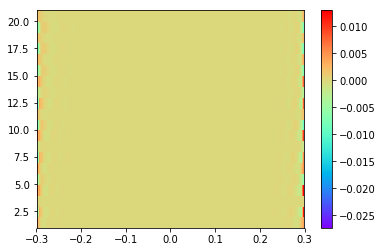

In [5]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import constants
from Electromagnetics.GSTCFD import GSTCFD_2D, PlaneWaveFD, MSTypes, GSTCFDSpectralAnalyzer
import scipy
from Electromagnetics.PWE import *


def MS_reflectionless_perfect_refract_E_arr(f, E_arr, y_max_L0):
    """ E_arr: incident field, intermediate fields and final transmitted field
        E_arr[0] : incident
        E_arr[1:-1]: intermediate fields
        E_arr[-1] : transmitted field
    """
    n_ms = E_arr.shape[0]-1
    Ny = E_arr.shape[1]
    X_ee_arr = np.zeros((n_ms, Ny), dtype=complex)
    X_mm_arr = np.zeros((n_ms, Ny), dtype=complex)
    
    L0 = constants.c/f
    y = np.linspace(-y_max_L0*L0, y_max_L0*L0, Ny)
    Ey = np.zeros(Ny, dtype=complex)
    Er = np.zeros((3, Ny), dtype=complex)
    Hr = np.zeros((3, Ny), dtype=complex)
    for i in range(0, n_ms):
        Ex_i   = E_arr[i,:]
        Ex_ip1 = E_arr[i+1,:]

        pwe = PWE2D(f, y, Ex_i, Ey)
        pwe.GetK()
        Z, Y, E_i_vec, H_i_vec = pwe.GetFields(np.array([0.0]))
        
        pwe = PWE2D(f, y, Ex_ip1, Ey)
        pwe.GetK()
        Z, Y, E_ip1_vec, H_ip1_vec = pwe.GetFields(np.array([0.0]))
        
        E_i_vec_ = np.zeros((3,Ny), dtype=complex)
        E_ip1_vec_ = np.zeros((3,Ny), dtype=complex)
        #print("E_i_vec[0].shape: ", E_i_vec[0][0,:].shape, E_i_vec_[0, :].shape)
        E_i_vec_[0, :] = E_i_vec[0][0,:]
        E_i_vec_[1, :] = E_i_vec[1][0,:]
        E_i_vec_[2, :] = E_i_vec[2][0,:]
        E_ip1_vec_[0, :] = E_ip1_vec[0][0,:]
        E_ip1_vec_[1, :] = E_ip1_vec[1][0,:]
        E_ip1_vec_[2, :] = E_ip1_vec[2][0,:]
        
        H_i_vec_ = np.zeros((3,Ny), dtype=complex)
        H_ip1_vec_ = np.zeros((3,Ny), dtype=complex)
        H_i_vec_[0, :] = H_i_vec[0][0,:]
        H_i_vec_[1, :] = H_i_vec[1][0,:]
        H_i_vec_[2, :] = H_i_vec[2][0,:]
        H_ip1_vec_[0, :] = H_ip1_vec[0][0,:]
        H_ip1_vec_[1, :] = H_ip1_vec[1][0,:]
        H_ip1_vec_[2, :] = H_ip1_vec[2][0,:]

        
        '''if i<n_ms-1:
            print('i: ', i)
            plot(y, np.real(E_ip1_vec_[0]), 'b')
            plot(y, np.real(E_arr_0[i]), 'b:')
            plot(y, np.imag(E_ip1_vec_[0]), 'r')
            plot(y, np.imag(E_arr_0[i]), 'r:')
            ylabel('$E_x$', fontsize=20)
            show()
            plot(y, np.real(H_ip1_vec_[1]), 'b')
            plot(y, np.real(H_arr_0[i]), 'b:')
            plot(y, np.imag(H_ip1_vec_[1]), 'r')
            plot(y, np.imag(H_arr_0[i]), 'r:')
            ylabel('$H_y$', fontsize=20)
            show()
            
        if i<n_ms-1:
            E_ip1_vec_[0,:] = E_arr_0[i]
            E_ip1_vec_[1,:] = np.zeros(Ny)
            H_ip1_vec_[0,:] = np.zeros(Ny)
            H_ip1_vec_[1,:] = H_arr_0[i]
        if i>0:
            E_i_vec_[0,:] = E_arr_0[i-1]
            E_i_vec_[1,:] = np.zeros(Ny)
            H_i_vec_[0,:] = np.zeros(Ny)
            H_i_vec_[1,:] = H_arr_0[i-1]'''
        
        
        E_irt = [E_i_vec_, Er, E_ip1_vec_]
        H_irt = [H_i_vec_, Hr, H_ip1_vec_]

        
        #print(E_i_vec_.shape, Er.shape, E_ip1_vec_.shape)
        #print(H_i_vec_.shape, Hr.shape, H_ip1_vec_.shape)
        
        ms = GSTCFD_2D(f, MSTypes.scalar, vbose=False)
        ms.SetFields(y, E_irt, H_irt)

        X_eemm, PM, EH_avg = ms.GetSusceptibilities()
        #dy = y[1]-y[0]

        P, M = PM
        E_avg, H_avg = EH_avg
        X_ee, X_mm = X_eemm

        X_ee_arr[i-1,:] = X_ee
        X_mm_arr[i-1,:] = X_mm
        
    return X_ee_arr, X_mm_arr


def X_optimize(f, n_ms, E_i, E_t, E_re, y_max_L0, ret_X=False):    
    Ny = len(E_i)
    E_arr = np.zeros((n_ms+1, Ny), dtype=complex)
    E_arr[0,:] = E_i
    E_arr[-1, :] = E_t
    
    E_ms_arr = np.zeros((n_ms-1, Ny), dtype=complex)
    for i in range(n_ms-1):
        E_ms_arr[i, :] = np.array(E_re[2*i*Ny:(2*i+1)*Ny]) + 1j*np.array(E_re[(2*i+1)*Ny:(2*i+2)*Ny])
    
    E_arr[1:-1, :] = E_ms_arr
        
    X_ee_arr, X_mm_arr = MS_reflectionless_perfect_refract_E_arr(f, E_arr, y_max_L0)
    
    if ret_X:
        """for __jj in range(n_ms-1):
            plot(y, np.real(E_arr_0[__jj]), 'r')
            plot(y, np.real(E_ms_arr[__jj]), 'r:')
            plot(y, np.imag(E_arr_0[__jj]), 'b')
            plot(y, np.imag(E_ms_arr[__jj]), 'b:')
            show()
        print("Max error : ", np.max(np.abs(E_arr_0 - E_ms_arr)))"""
        return X_ee_arr, X_mm_arr
    
    cost = np.max(np.abs(np.real(X_ee_arr))) + np.max(np.abs(np.real(X_mm_arr))) \
        + 10.0*np.max(np.abs(np.imag(X_ee_arr))) + 10.0*np.max(np.abs(np.imag(X_mm_arr)))
        
    
    return cost


def MS_reflectionless_perfect_refract_Get_IT_Efields(f, theta_i, theta_t, T=1, y_max_L0=10, Ny=2**8):
    I, R = 1.0, 0.0
    X_ee_arr = np.zeros((n_ms, Ny), dtype=complex)
    X_mm_arr = np.zeros((n_ms, Ny), dtype=complex)

    a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(theta_i, np.pi/2.0)
    k_i = a_r
    a_x = np.array([1.0, 0.0, 0.0])#-a_phi
    E_i = I*a_x

    a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(np.pi, np.pi/2.0)
    k_r = a_r
    E_r = R*a_x

    a_r, a_theta, a_phi = PlaneWaveFD.AngleToVec(theta_t, np.pi/2.0)
    k_t = a_r
    E_t = T*a_x

    pw = PlaneWaveFD(f, vbose=False)

    pw.SetPW(E_i, E_r, E_t, k_i, k_r, k_t)

    L0 = constants.c/f
    y_max = y_max_L0*L0
    y, E_irt, H_irt = pw.GetIRTFieldsOnMS(N_y=Ny, nl_y=1.0, l_y_max=y_max)
    E_i_vec, E_r_vec, E_t_vec = E_irt
    H_i_vec, H_r_vec, H_t_vec = H_irt

    return E_i_vec[0], E_t_vec[0]
        

f = 10.0*constants.giga
L0 = constants.c/f

T = 1.0
theta_i = 30.0/180.0*np.pi
theta_t = -45/180.0*np.pi

Ny = 2**8
y_max_L0 = 10
n_ms = 21


E_i, E_t = MS_reflectionless_perfect_refract_Get_IT_Efields(f, theta_i, theta_t, T=1, y_max_L0=y_max_L0, Ny=Ny)

## initial optimum indivitual : I will manually set a member of the first population
E_arr_0, H_arr_0 = MS_reflectionless_perfect_refract_interpolate_angle(f, theta_i, theta_t, T=T, n_ms=n_ms, y_max_L0=y_max_L0, Ny=Ny, ret_E_mid=True)
E_arr_re_0 = np.zeros(2*Ny*(n_ms-1))
for i in range(n_ms-1):
    ind_st = i*2*Ny
    E_arr_re_0[ind_st   : ind_st+Ny  ] = np.real(E_arr_0[i])
    E_arr_re_0[ind_st+Ny: ind_st+2*Ny] = np.imag(E_arr_0[i])

f_opt = lambda E_re, ret_X=False : X_optimize(f, n_ms, E_i, E_t, E_re, y_max_L0, ret_X)


from Electromagnetics.Misc import tic, toc
tic()
from Electromagnetics.EvolAlgs import gaOptimizer

res = gaOptimizer(f_opt, intervals=[(-1.0, 1.0)]*2*Ny*(n_ms-1), pop_size=100, n_gen=100, mu_sd=0.2,
                 maximize=False, parallel=False, x_0=None) ##x_0=E_arr_re_0

print("optimum cost: ", res[0][1])

print("Processing time:", toc())


X_ee_arr, X_mm_arr = f_opt(res[0][0], ret_X=True)

y = np.linspace(-y_max_L0*L0, y_max_L0*L0, Ny)
N, Y = np.meshgrid(np.arange(1, n_ms+1), y, indexing='ij')

plt.pcolor(Y, N, np.real(X_ee_arr), cmap='rainbow')
plt.colorbar()
plt.show()

plt.pcolor(Y, N, np.imag(X_ee_arr), cmap='rainbow')
plt.colorbar()
plt.show()

plt.pcolor(Y, N, np.real(X_mm_arr), cmap='rainbow')
plt.colorbar()
plt.show()

plt.pcolor(Y, N, np.imag(X_mm_arr), cmap='rainbow')
plt.colorbar()
plt.show()

